In [1]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anuragraychaudhuri","key":"255d4c1370fa9590e574a875b5df56d9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 215M/218M [00:10<00:00, 23.9MB/s]
100% 218M/218M [00:10<00:00, 21.6MB/s]


In [5]:
!rm -rf data
!unzip cat-and-dog.zip -d data


Streaming output truncated to the last 5000 lines.
  inflating: data/training_set/training_set/cats/cat.3704.jpg  
  inflating: data/training_set/training_set/cats/cat.3705.jpg  
  inflating: data/training_set/training_set/cats/cat.3706.jpg  
  inflating: data/training_set/training_set/cats/cat.3707.jpg  
  inflating: data/training_set/training_set/cats/cat.3708.jpg  
  inflating: data/training_set/training_set/cats/cat.3709.jpg  
  inflating: data/training_set/training_set/cats/cat.371.jpg  
  inflating: data/training_set/training_set/cats/cat.3710.jpg  
  inflating: data/training_set/training_set/cats/cat.3711.jpg  
  inflating: data/training_set/training_set/cats/cat.3712.jpg  
  inflating: data/training_set/training_set/cats/cat.3713.jpg  
  inflating: data/training_set/training_set/cats/cat.3714.jpg  
  inflating: data/training_set/training_set/cats/cat.3715.jpg  
  inflating: data/training_set/training_set/cats/cat.3716.jpg  
  inflating: data/training_set/training_set/cats/cat.3

In [6]:
!pip install opencv-python


In [19]:
import cv2
import os
import numpy as np

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize images to 64x64
            '''img = img.flatten()  # Flatten the image'''
            images.append(img)
            labels.append(label)
    return images, labels

cat_images, cat_labels = load_images_from_folder("data/training_set/training_set/cats", 0)
dog_images, dog_labels = load_images_from_folder("data/training_set/training_set/dogs", 1)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)


# Train Machine Learning Models

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## SVM

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))


SVM Accuracy: 0.5646470955652717


## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Random Forest Accuracy: 0.6358525921299188


## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))

Logistic Regression Accuracy: 0.5708931917551531


## K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
print("K-Means Clustering Labels:", kmeans.labels_)

K-Means Clustering Labels: [1 1 0 ... 1 1 1]


# Results and Analysis

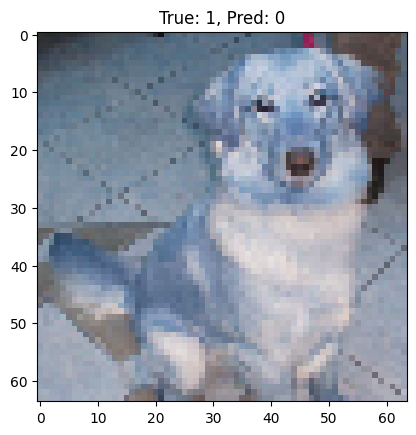

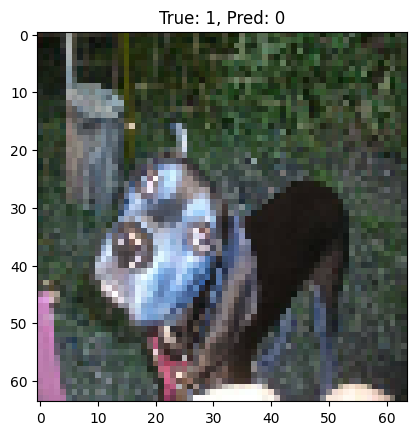

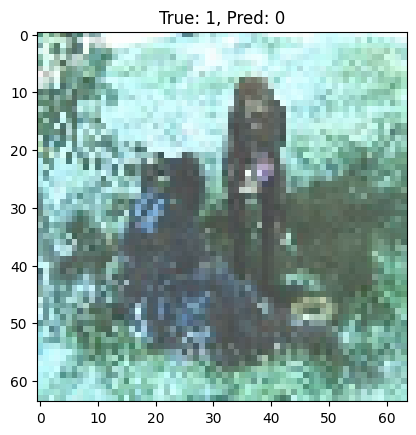

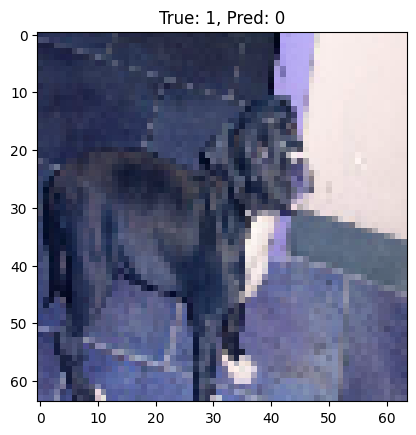

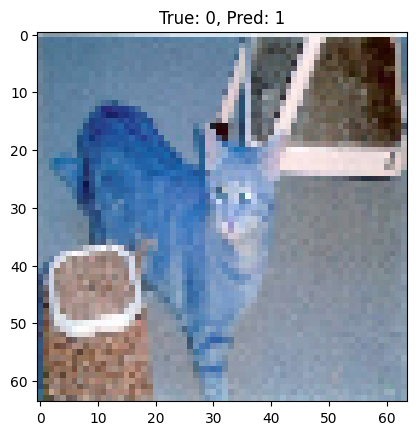

In [13]:
import matplotlib.pyplot as plt

misclassified_indices = np.where(y_test != svm_preds)[0]
for i, idx in enumerate(misclassified_indices[:5]):
    plt.imshow(X_test[idx].reshape(64, 64, 3))
    plt.title(f"True: {y_test[idx]}, Pred: {svm_preds[idx]}")
    plt.show()


# Save the trained model

In [15]:
import joblib

# Save models
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Normalize images and one-hot encode labels
X = X / 255.0
y = to_categorical(y, 2)

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define image size - This was missing
img_size = (64, 64)

# Build CNN model
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (img_size[0], img_size[1], 3)
model = create_model(input_shape)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5238 - loss: 0.6909 - val_accuracy: 0.6527 - val_loss: 0.6382
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6446 - loss: 0.6300 - val_accuracy: 0.6683 - val_loss: 0.6101
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7008 - loss: 0.5859 - val_accuracy: 0.6858 - val_loss: 0.6069
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7363 - loss: 0.5315 - val_accuracy: 0.7545 - val_loss: 0.5071
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7798 - loss: 0.4627 - val_accuracy: 0.7508 - val_loss: 0.5055
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8169 - loss: 0.4095 - val_accuracy: 0.7527 - val_loss: 0.5310
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8242 - loss: 0.3867 - val_accuracy: 0.8007 - val_loss: 0.4568
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8295 - loss: 0.3768 - val_accuracy:

In [21]:
from sklearn.metrics import classification_report, accuracy_score

# Save the trained model
model.save("cat_dog_classifier.h5")
print("Model saved as cat_dog_classifier.h5")

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Accuracy and Classification Report
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.4f}")

report = classification_report(y_true_classes, y_pred_classes, target_names=['Cat', 'Dog'])
print("Classification Report:\n", report)

Model saved as cat_dog_classifier.h5
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Validation Accuracy: 0.7933
Classification Report:
               precision    recall  f1-score   support

         Cat       0.77      0.85      0.81       819
         Dog       0.82      0.74      0.78       782

    accuracy                           0.79      1601
   macro avg       0.80      0.79      0.79      1601
weighted avg       0.80      0.79      0.79      1601

